# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

# Kruschke's light blue color
sns.set_palette(["#87ceeb"])
sns.set_context("talk")

In [2]:
df = pd.read_csv("data/TwoGroupIQ.csv")
# Only work with the "Smart Drug" group
df = df[df.Group == "Smart Drug"]

print len(df)
df.head()

63


,Score,Group
0,102,Smart Drug
1,107,Smart Drug
2,92,Smart Drug
3,101,Smart Drug
4,110,Smart Drug


In [3]:
with pm.Model() as model:
    # Priors
    sigma = pm.Uniform("sigma", df.Score.std() / 1000, df.Score.std() * 1000)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    # Likelihood
    y = pm.Normal("y", mu=mu, sd=sigma, observed=df.Score)
    # Sample
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000

Optimization terminated successfully.
         Current function value: 309.833431
         Iterations: 16
         Function evaluations: 29
         Gradient evaluations: 29


100%|██████████| 10000/10000 [00:01<00:00, 6450.53it/s]


In [4]:
pm.df_summary(trace[burn_in:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,107.730039,3.097721,0.076870,101.600958,113.419433
sigma,25.813262,2.364924,0.072883,21.569025,30.585283


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149ad310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117028a90>]], dtype=object)

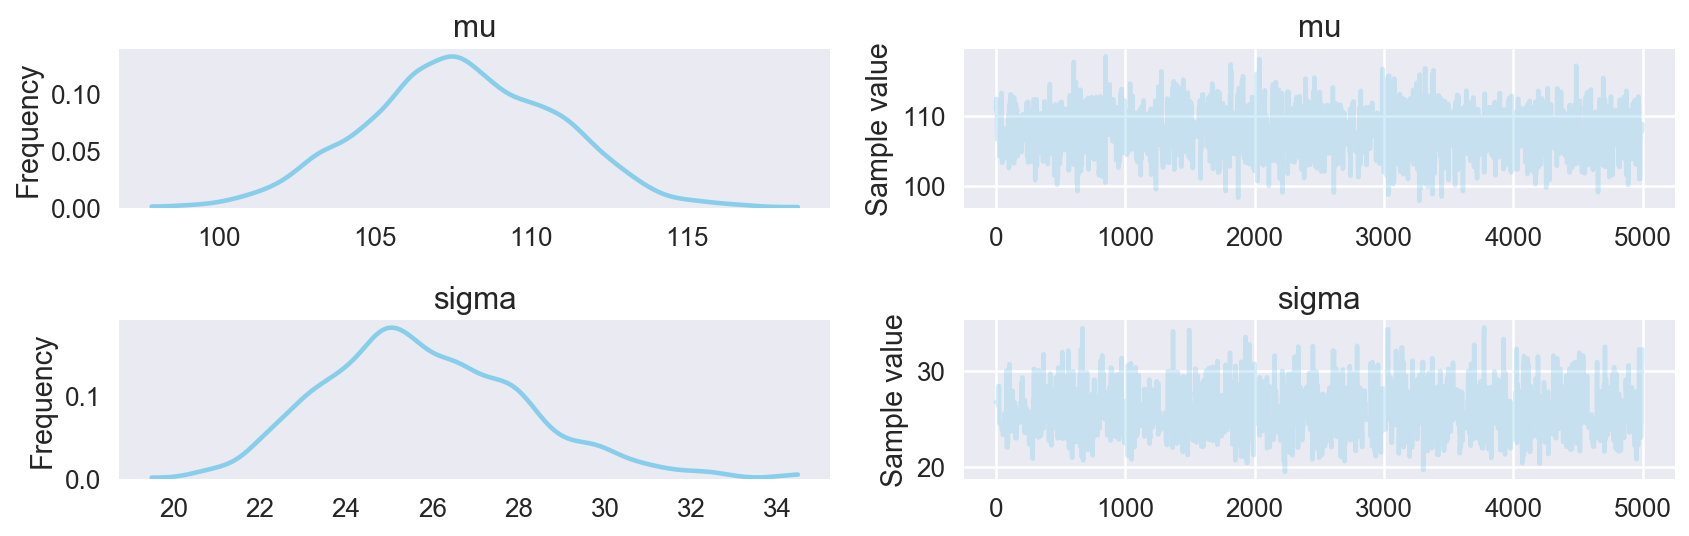

In [5]:
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117154750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10db41b10>], dtype=object)

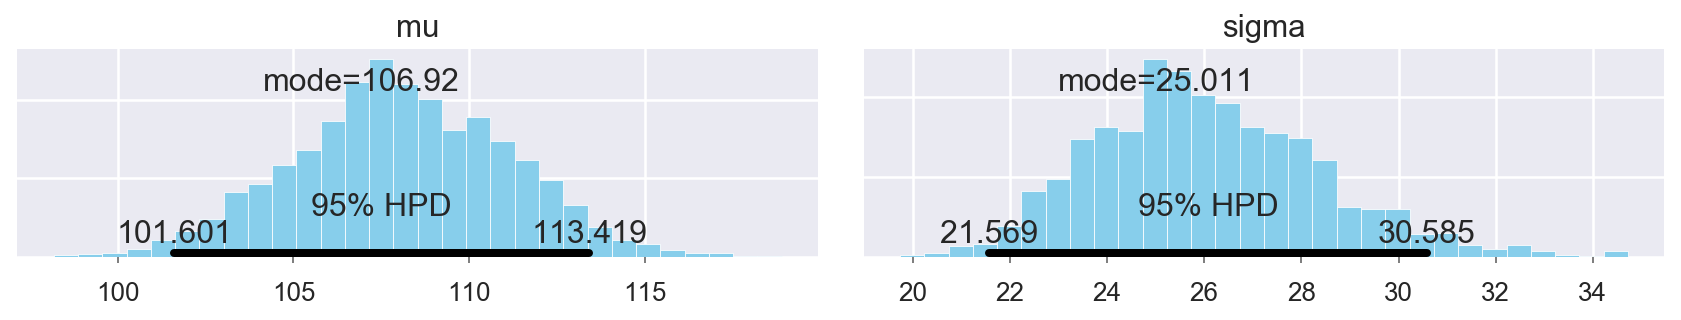

In [6]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")